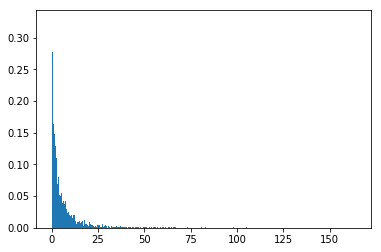

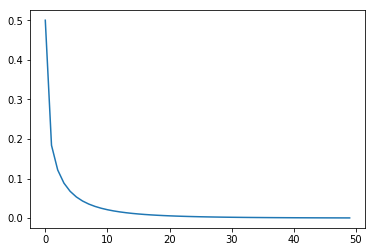

In [52]:
#1) Slice Sampler
import numpy as np
import matplotlib.pyplot as plt
from random import random

#N how many samples should be generated
def slice(x,N,d):
    samples=[]
    for _ in range(N):
        U=random()*np.exp(-x**(1/d))/2
        x=random()*(-np.log(2*U))**d
        samples.append(x)
    return samples

d=2
plt.hist(slice(0,10000,d),bins=1000,density=True)
#a,h=np.histogram(slice(0,10000,d),bins=1000)
#plt.plot((h[:-1]+h[1:])/2,a/10000)
plt.show()
plt.plot(np.exp(-np.arange(50)**(1/d))/2)

In [60]:
#2) instead of accapt one spim flip accept whole new grid

def Hval(h,J,N,s):
    if len(s)!=N*N:
        print('wrong s')
        return
    summ=0
    for i in range(N*N):
        #upper neighbor
        summ+=s[i]*s[i-N]
        #left neighbor, spcial case
        if i % N:
            summ+=s[i]*s[i-1]
        else:
            summ+=s[i]*s[i+N-1]
    return -J*summ-h*np.sum(s)

#nxN grid, case=s_j: spin up or down, s:input
def fj(H,J,N,s,j,case=0):
    #upper
    summ=s[j-N]
    #left, special cases
    if j % N:
        summ+=s[j-1]
    else:
        summ+=s[j+N-1]
    #right,special cases
    if j%N==N-1:
        summ+=s[j-N+1]
    else:
        summ+=s[j+1]
    #down
    summ+=s[(j+N)%(N*N)]
    hilf=-H-J*summ
    return np.exp(case*hilf)/(np.exp(hilf)+np.exp(-hilf))

def gibbs(H,J,N,s):
    for j in range(N**2):
        zero=fj(H,J,N,s,j)
        one=fj(H,J,N,s,j,1)
        if random()*(zero+one)<=zero:
            s[j]=0
        else:
            s[j]=1
    return s       
    
spin=[-1,1]
N=5
J=1
H=1
s=np.random.choice(spin,N*N)
print(gibbs(H,J,N,s))

def randomGibbs(H,J,s,T,I):
    c=0
    currHval=Hval(H,J,N,s)
    for _ in range(I):
        s2=gibbs(H,J,N,s)
        newHval=Hval(H,J,N,s2)
        #step 3, exept/reject
        p=min(1,np.exp(-(currHval-newHval)/T))
        #print(p)
        if random()<=p:
            c+=1
            #if execpted flip index j
            s=s2
            currHval=newHval
    return s,c



[1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]


In [66]:
#2) Metropolis with counter
def deltaH(h,J,N,s,j):
    #upper
    summ=s[j-N]
    #left, special cases
    if j % N:
        summ+=s[j-1]
    else:
        summ+=s[j+N-1]
    #right,special cases
    if j%N==N-1:
        summ+=s[j-N+1]
    else:
        summ+=s[j+1]
    #down
    summ+=s[(j+N)%(N*N)]
    return -2*J*s[j]*summ-2*h*s[j]
#print ('delta H for given values is: ',deltaH(h,J,N,s,3))


def randomIsing(h,J,s,T,I):
    c=0
    for _ in range(I):
        #which index should be flipped
        #random.randint(a) gives an integer from 0 to (a-1) uniformly distributed
        j=np.random.randint(len(s))
        #step 3, exept/reject
        p=min(1,np.exp(-deltaH(h,J,int(np.sqrt(len(s))),s,j)/T))
        #print(p)
        if random()<=p:
            c+=1
            #if execpted flip index j
            s[j]*=-1
    return s,c



In [65]:
#acceptance rate compared for gibbs and metropolis algo
s=np.random.choice(spin,N*N)
sG,cG=randomGibbs(H,J,s,3,100)
sI,cI=randomIsing(H,J,s,3,100)
print("Gibbs accepted",cG,"times new grid")#,Hval(H,J,N,sG))
print("Ising accepted",cI,"times spin flips")#,Hval(H,J,N,sI))

Gibbs accepted 64 times new grid
Ising accepted 97 times spin flips
